# Project description - Recommendation of tariffs

Based on the data on the behavior of customers who have already switched to the appropriate tariffs, it is necessary to build a model for the classification task that will choose the appropriate tariff. The data is preprocessed.

**Task**: Build a model with the largest possible value of *accuracy*.

**Content**


1. Initial data analysis


2. Splitting data into samples


3. Analysis of models


4. Checking the model on a test sample


5. Checking the model for adequacy


6. Final conclusions

**Data description**


Each object in the dataset is information about the behavior of one user per month:


calls — number of calls;


minutes — total duration of calls in minutes;


messages — number of sms messages;


mb_used — consumed internet traffic in Mb;


is_ultra — what tariff was used during the month ("Ultra" — 1, "Smart" — 0).

## 1. Initial data analysis

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv('users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


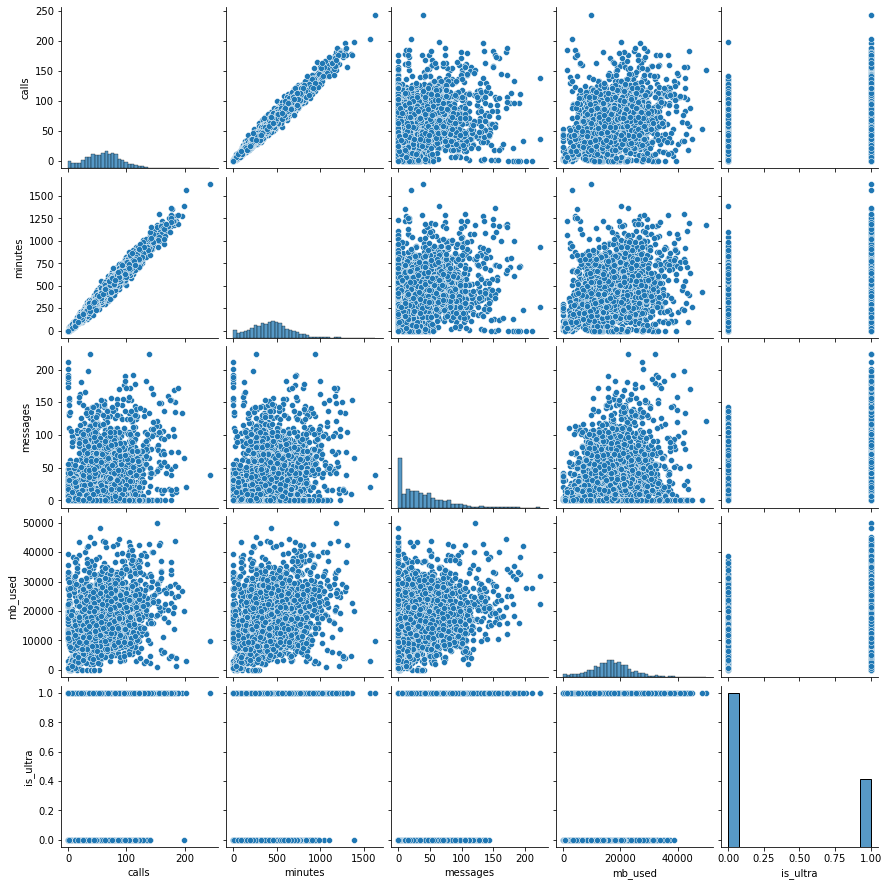

In [7]:
sns.pairplot(df)
plt.show()

## 2. Splitting data into samples

We will divide the general population into training, validation and test in the proportions of 70, 15 and 15%.

In [8]:
df = df.drop(['minutes'], axis=1)

In [9]:
# Dividing into the samples
train_df, validate_df, test_df = np.split(df, [int(.7*len(df)), int(.85 * len(df))])

In [10]:
# Let's write a function to highlight features and target in the samples
def features_target_split(df):
    features = df.drop(['is_ultra'], axis = 1)
    target = df['is_ultra']
    return features, target

Let's highlight features and targets for each sample

In [11]:
features_train, target_train = features_target_split(train_df)
features_valid, target_valid = features_target_split(validate_df)
features_test, target_test = features_target_split(test_df)

## 3. Analysis of models

In [12]:
final_data = pd.DataFrame(columns = ['type', 'train_accuracy', 'valid_accuracy'])

max_accuracy_train = 0
max_accuracy_val = 0

In [13]:
def best_model_search(name_model, model):
    global best_model, max_accuracy_train, final_data
    model.fit(features_train, target_train)
    accuracy = model.score(features_train, target_train)
    if accuracy > max_accuracy_train:
        # overfitting control
        valid_accuracy = model.score(features_valid, target_valid)
        diff = ((valid_accuracy-accuracy)**2)**.5
        if diff > .2:
            if diff > .1:
                max_accuracy_train = valid_accuracy
            else:
                max_accuracy_train = accuracy
            intr_st = pd.Series([name_model, accuracy, valid_accuracy], index=final_data.columns)
            final_data = final_data.append(intr_st, ignore_index=True)
    
    

In [14]:
# Let's apply for a decision tree
for depth in range(1, 101):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    best_model_search('Decision tree ({})'.format(depth), model)

In [15]:
# Let's apply for a random forest
for est in range(1, 101):
    model = RandomForestClassifier(n_estimators=est, random_state=12345)
    best_model_search('Random forest ({})'.format(est), model)

In [16]:
# Let's apply for a logistic regression
model = LogisticRegression(random_state = 12345)
best_model_search('Logistic regression', model)

In [17]:
final_data.sort_values('valid_accuracy', ascending=False).head(30)

,type,train_accuracy,valid_accuracy
105,Random forest (73),0.999555,0.798755
108,Random forest (76),1.000000,0.798755
110,Random forest (78),1.000000,0.798755
111,Random forest (79),1.000000,0.798755
112,Random forest (85),1.000000,0.798755
114,Random forest (88),1.000000,0.798755
115,Random forest (89),1.000000,0.798755
116,Random forest (90),1.000000,0.798755
104,Random forest (72),0.999111,0.798755
118,Random forest (92),1.000000,0.798755


## 4. Checking the model on a test sample

In [18]:
model = RandomForestClassifier(n_estimators=76, random_state = 12345)

model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=76, random_state=12345)

In [19]:
# Accuracy on train sample
model.score(features_train, target_train)

1.0

In [20]:
# Accuracy on test sample
model.score(features_test, target_test)

0.8053830227743272

## 5. Checking the model for adequacy

In [21]:
#The model's answers are not related to the correct answers, so the probability of guessing "1" is 0.5
smart_count = sum(target_test==0)
ultra_count = sum(target_test==1)
probability = 0.5

random_accuracy = (smart_count * smart_count / len(target_test) * probability +
                   ultra_count * ultra_count / len(target_test) * probability) / len(target_test)
random_accuracy

0.2866766114133114

## Final conclusions

The source dataset is a 3214x5 table in which the is_ultra column is the target for the binary classification problem. The data has already been preprocessed and no empty cells were found in the rows. It can be seen from the paired graph that most of the data is evenly distributed, with the exception of messages, since there the distribution is shifted to the left. It is also seen that there is a direct correlation between the number of minutes and the total duration of conversations. To improve the quality of the learning process, one of the correlated parameters (minutes) was thrown out. The data is split by splitting the original data set in the proportions of 70%, 15%, 15%. 


Based on the conducted research with several types of models, the Random forest model gives the highest quality of prediction when setting the number of trees equal to 76. 

After training the model on the training data set, the generalizing ability of the model on the test set exceeds 75%, which indicates that this model meets the requirements presented

Based on the assessment of the model for sanity, it can be concluded that the accuracy of random guessing of the tariff is 29%, which is significantly lower than the generalizing ability of the model, therefore, the model is adequate